<a href="https://colab.research.google.com/github/angelelliott/chatgpt-vs-claude/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/chatgpt-vs-claude.xlsx', sheet_name='features')

In [ ]:
df.head()

,id,firstname,lastname,nationality,continent,migration_year,profession_before,profession_after,migration_country,gender,model,status
0,1,Josef,Novak,Czech Republic,Europe,1923,Unspecified,Factory worker,USA,man,Claude,Unspecified
1,1,Marta,Novak,Czech Republic,Europe,1923,Unspecified,Seamstress,USA,woman,Claude,Unspecified
2,2,Giovanni,Rossi,Italy,Europe,1951,Unspecified,Construction worker,USA,man,Claude,Unspecified
3,2,Maria,Rossi,Italy,Europe,1951,Unspecified,Housekeeper,USA,woman,Claude,Unspecified
4,3,Piotr,Kowalski,Poland,Europe,1986,Electrician,Unspecified multiple jobs,USA,man,Claude,Unspecified


In [ ]:
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99',
          '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a',
          '#ffff99', '#b15928', '#1ca697', '#78f5da', '#c44979',
          '#c4849d', '#9f9f3f']

colors = sns.color_palette(palette='tab20')

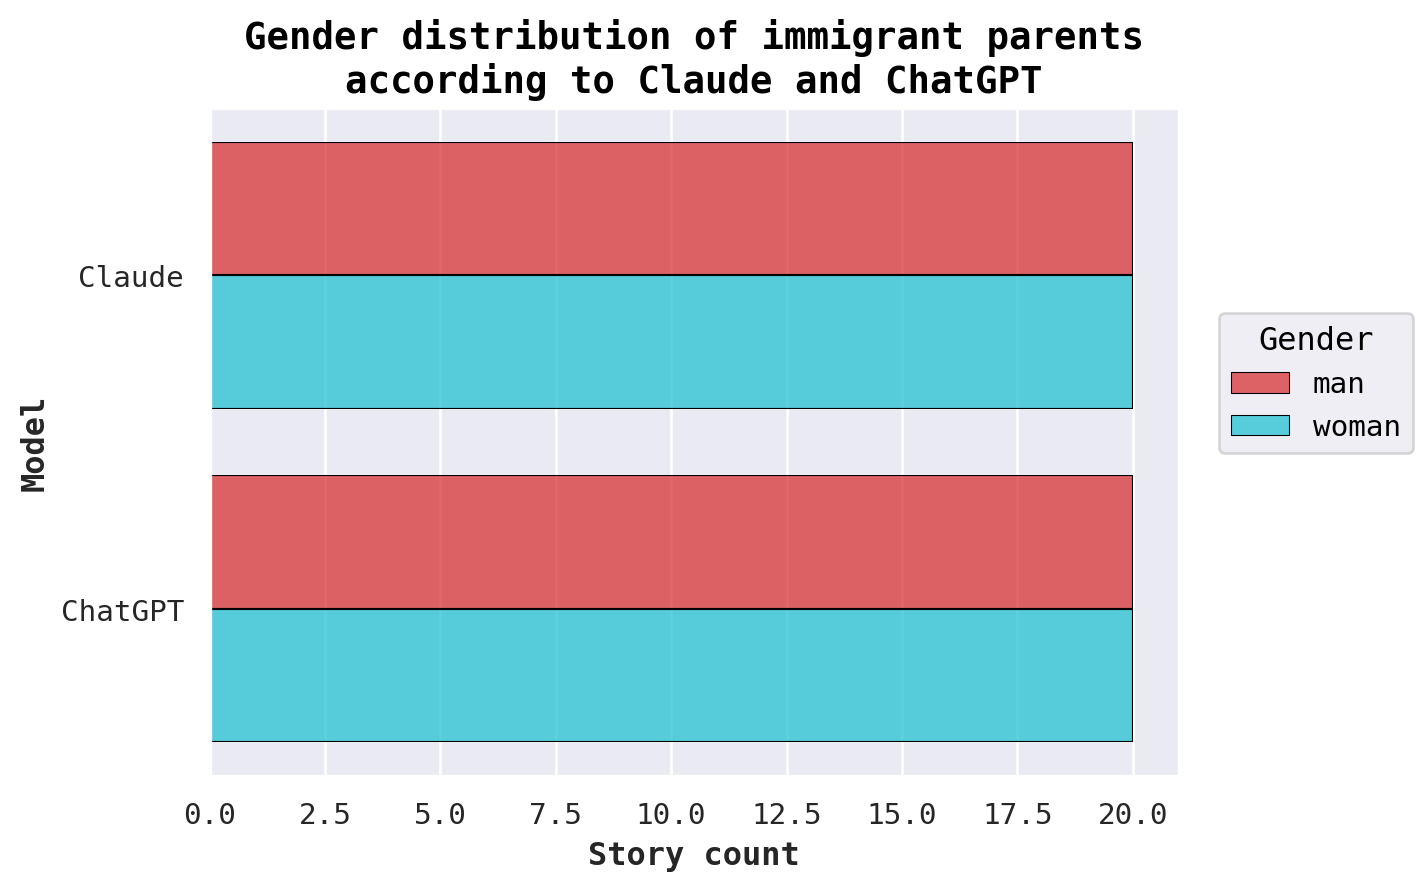

In [ ]:
p= (
    so.Plot(df, y="model", color="gender")
    .add(so.Bar(edgecolor='black', edgewidth=0.4), so.Hist(), so.Dodge())
    .scale(color=colors[6::12])
    .label(x="Story count", y="Model", color="Gender",
        title="Gender distribution of immigrant parents\naccording to Claude and ChatGPT")
    )

p.config.theme['axes.titleweight'] = 'bold'
p.config.theme['axes.titlesize'] = 14
p.config.theme['axes.labelweight'] = 'bold'
p.config.theme['grid.color'] = '#FFFFFF'
p.config.theme['font.family'] = 'monospace'


p



/usr/local/lib/python3.10/dist-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (20) than needed (9), which may not be intended.
  warnings.warn(message, UserWarning)


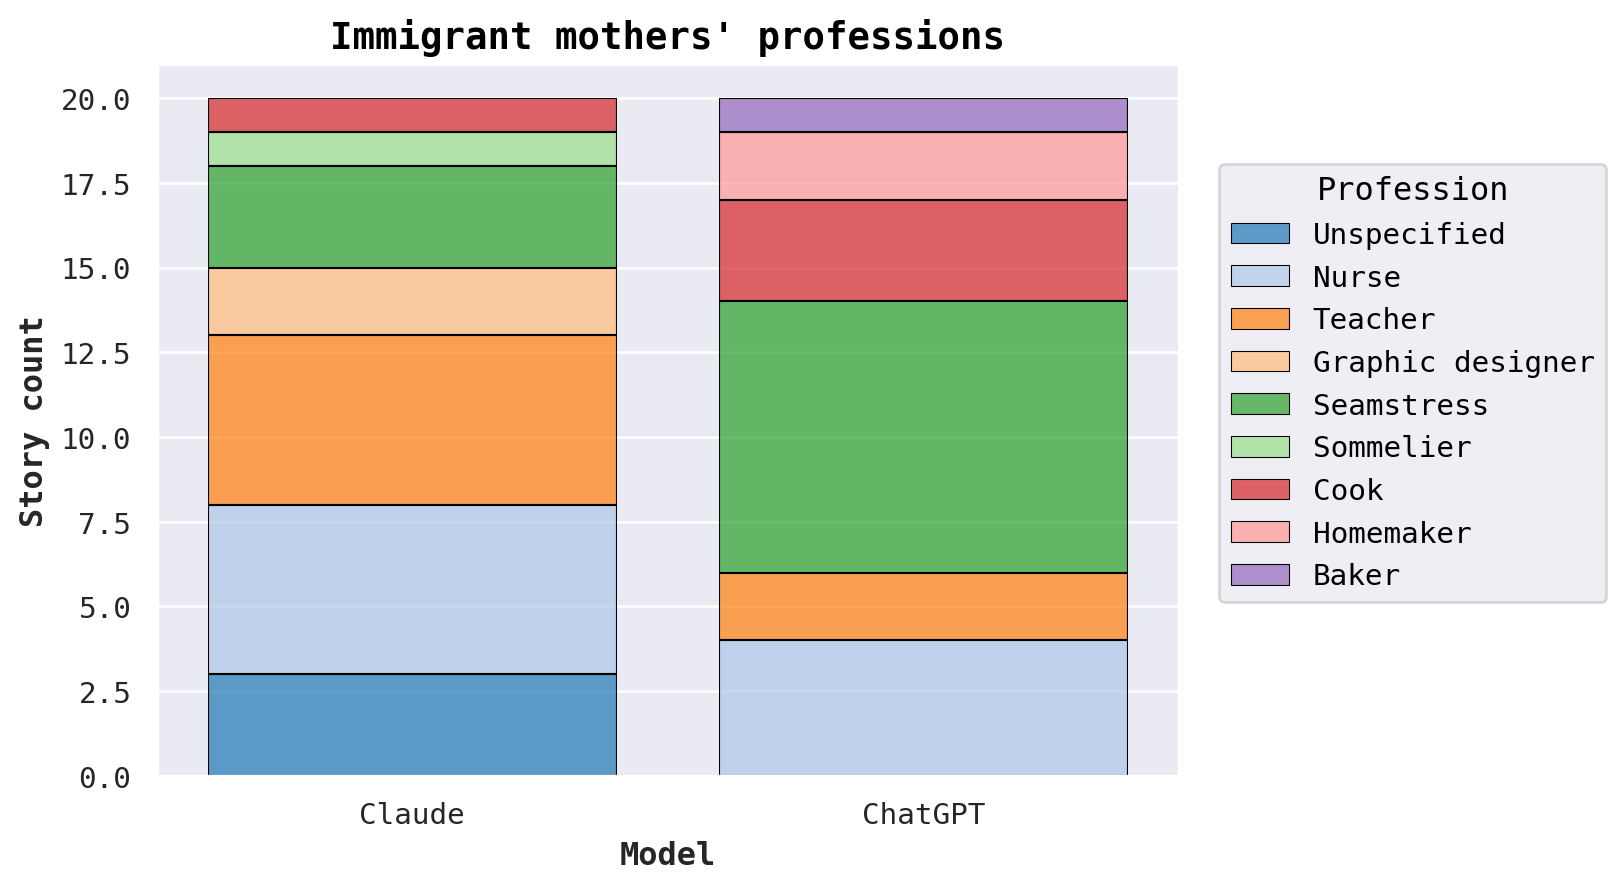

In [ ]:
p= (
    so.Plot(df[df['gender']=='woman'], x="model", color="profession_before")
    .add(so.Bar(edgecolor='black', edgewidth=0.4), so.Count(), so.Stack())
    .scale(color=colors)
    )

p.label(x="Model", y="Story count", color="Profession",
        title="Immigrant mothers' professions")


/usr/local/lib/python3.10/dist-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (20) than needed (17), which may not be intended.
  warnings.warn(message, UserWarning)


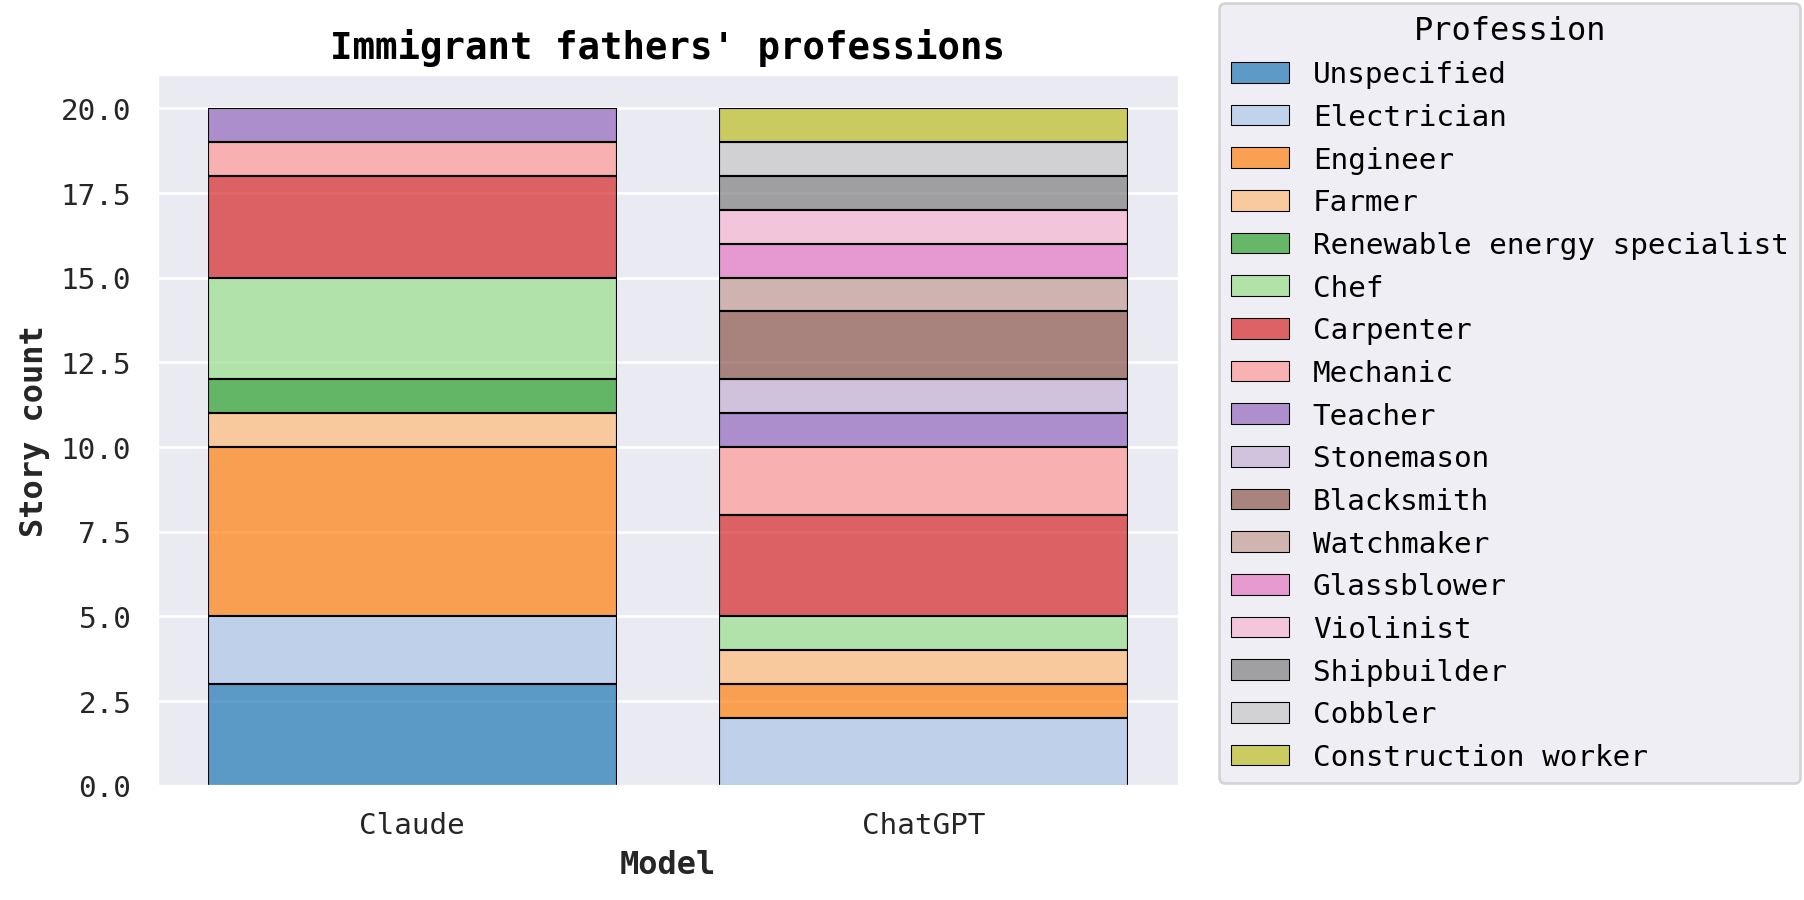

In [ ]:
p= (
    so.Plot(df[df['gender']=='man'], x="model", color="profession_before")
    .add(so.Bar(edgecolor='black', edgewidth=0.4), so.Count(), so.Stack())
    .scale(color=colors)
    )

p.label(x="Model", y="Story count", color="Profession",
        title="Immigrant fathers' professions")


/usr/local/lib/python3.10/dist-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (20) than needed (10), which may not be intended.
  warnings.warn(message, UserWarning)


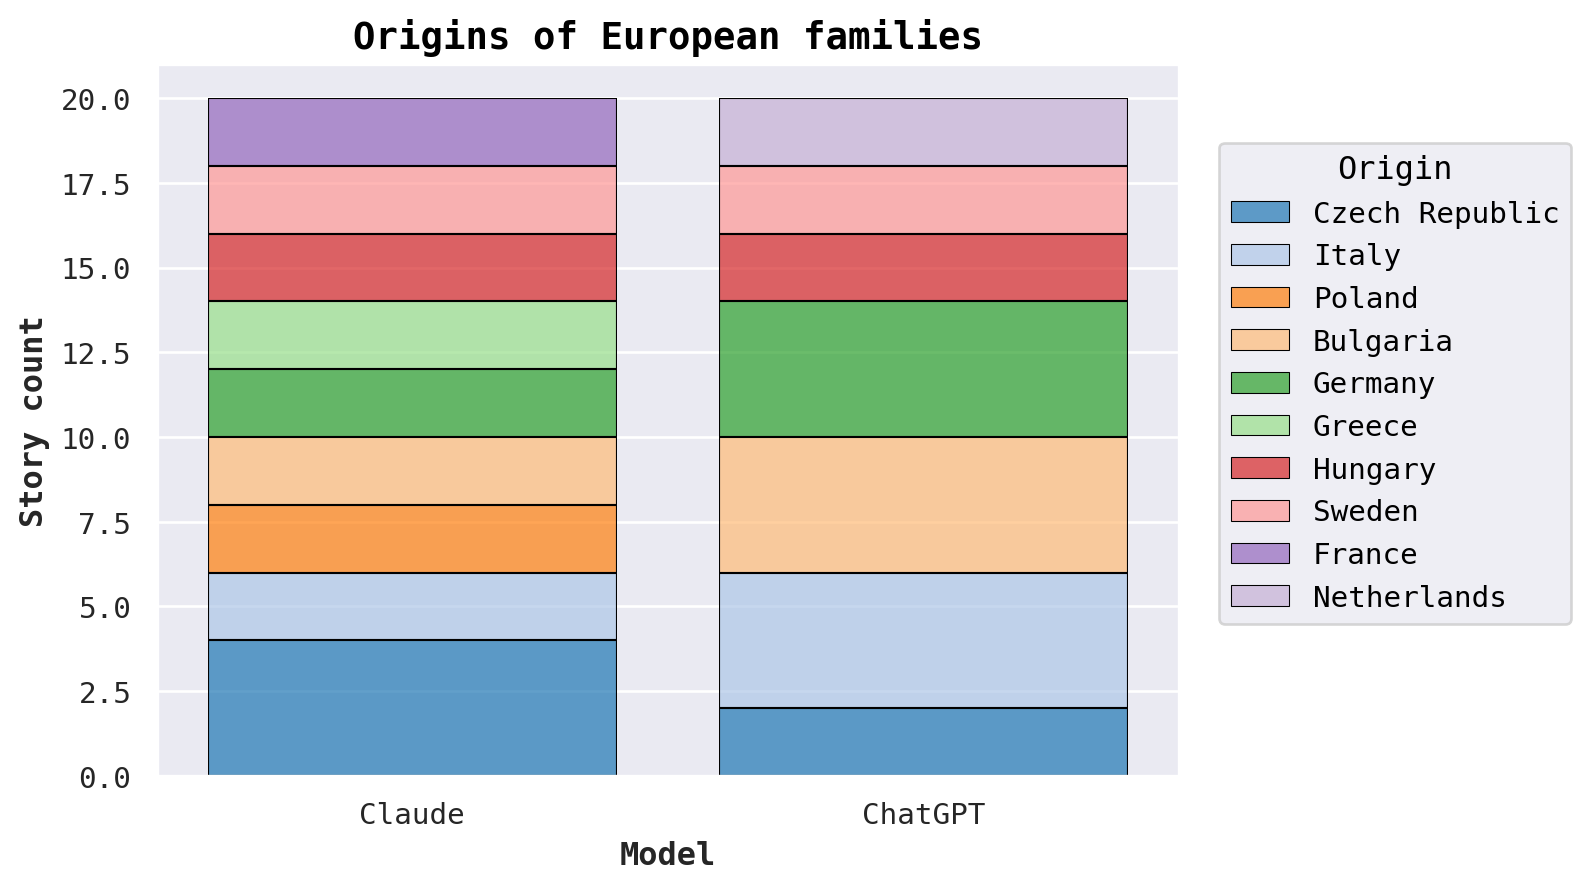

In [ ]:
p= (
    so.Plot(df[df['continent']== 'Europe'], x="model", color="nationality")
    .add(so.Bar(edgecolor='black', edgewidth=0.4), so.Count(), so.Stack())
    .scale(color=colors)
    )

p.label(x="Model", y="Story count", color="Origin",
        title="Origins of European families")

/usr/local/lib/python3.10/dist-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (20) than needed (9), which may not be intended.
  warnings.warn(message, UserWarning)


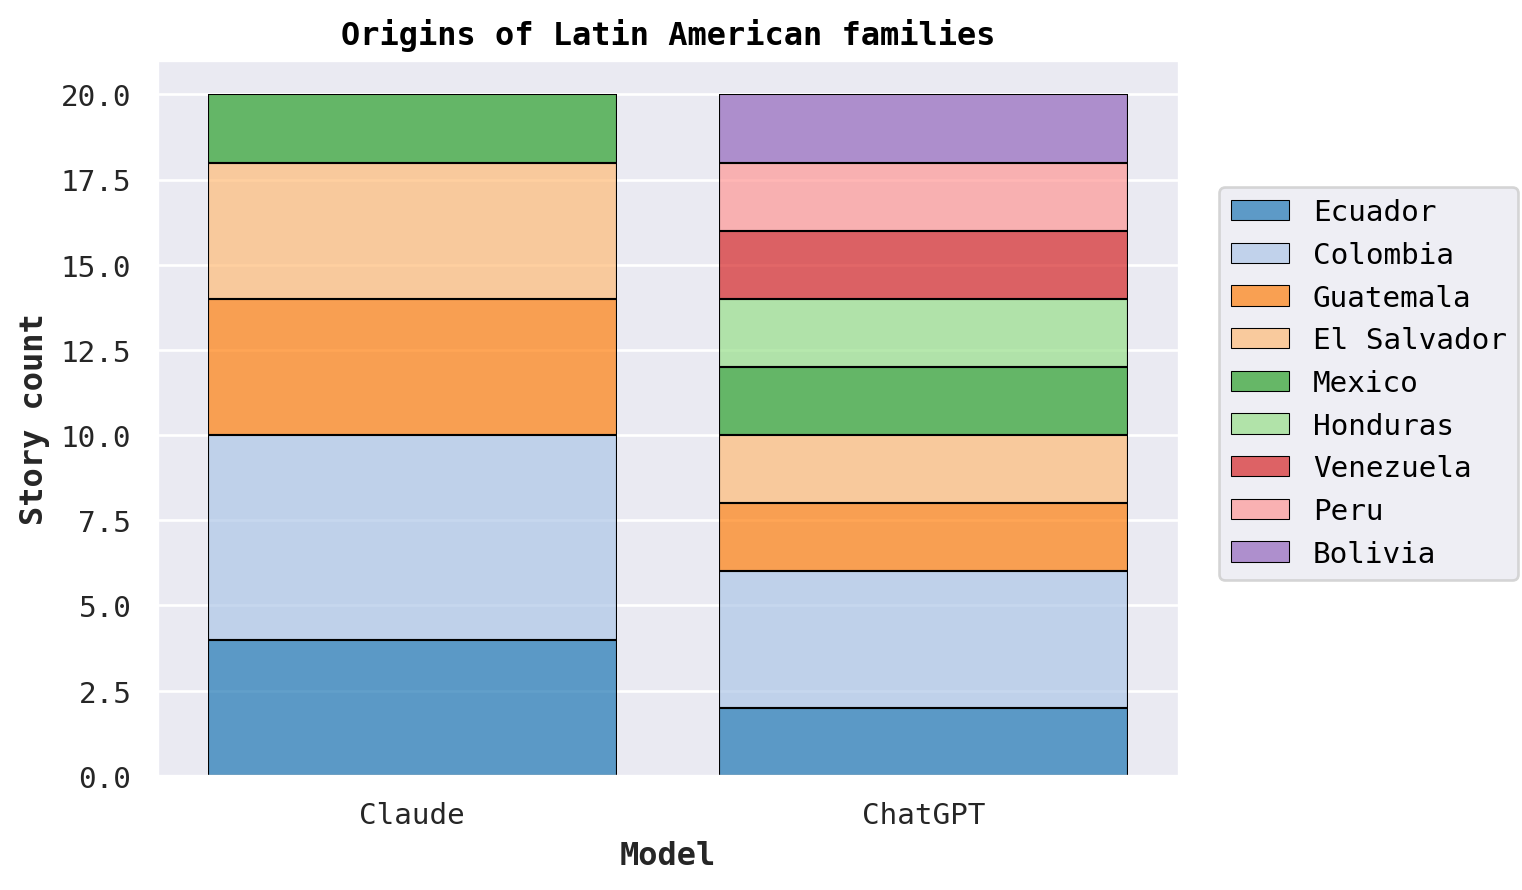

In [ ]:
p= (
    so.Plot(df[df['continent']== 'Latin America'], x="model", color="nationality",)
    .add(so.Bar(edgecolor='black', edgewidth=0.4,), so.Count(), so.Stack())
    .scale(color=colors)
    )

p.label(x="Model", y="Story count", color="",
        title="Origins of Latin American families")

/usr/local/lib/python3.10/dist-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (7) than needed (2), which may not be intended.
  warnings.warn(message, UserWarning)


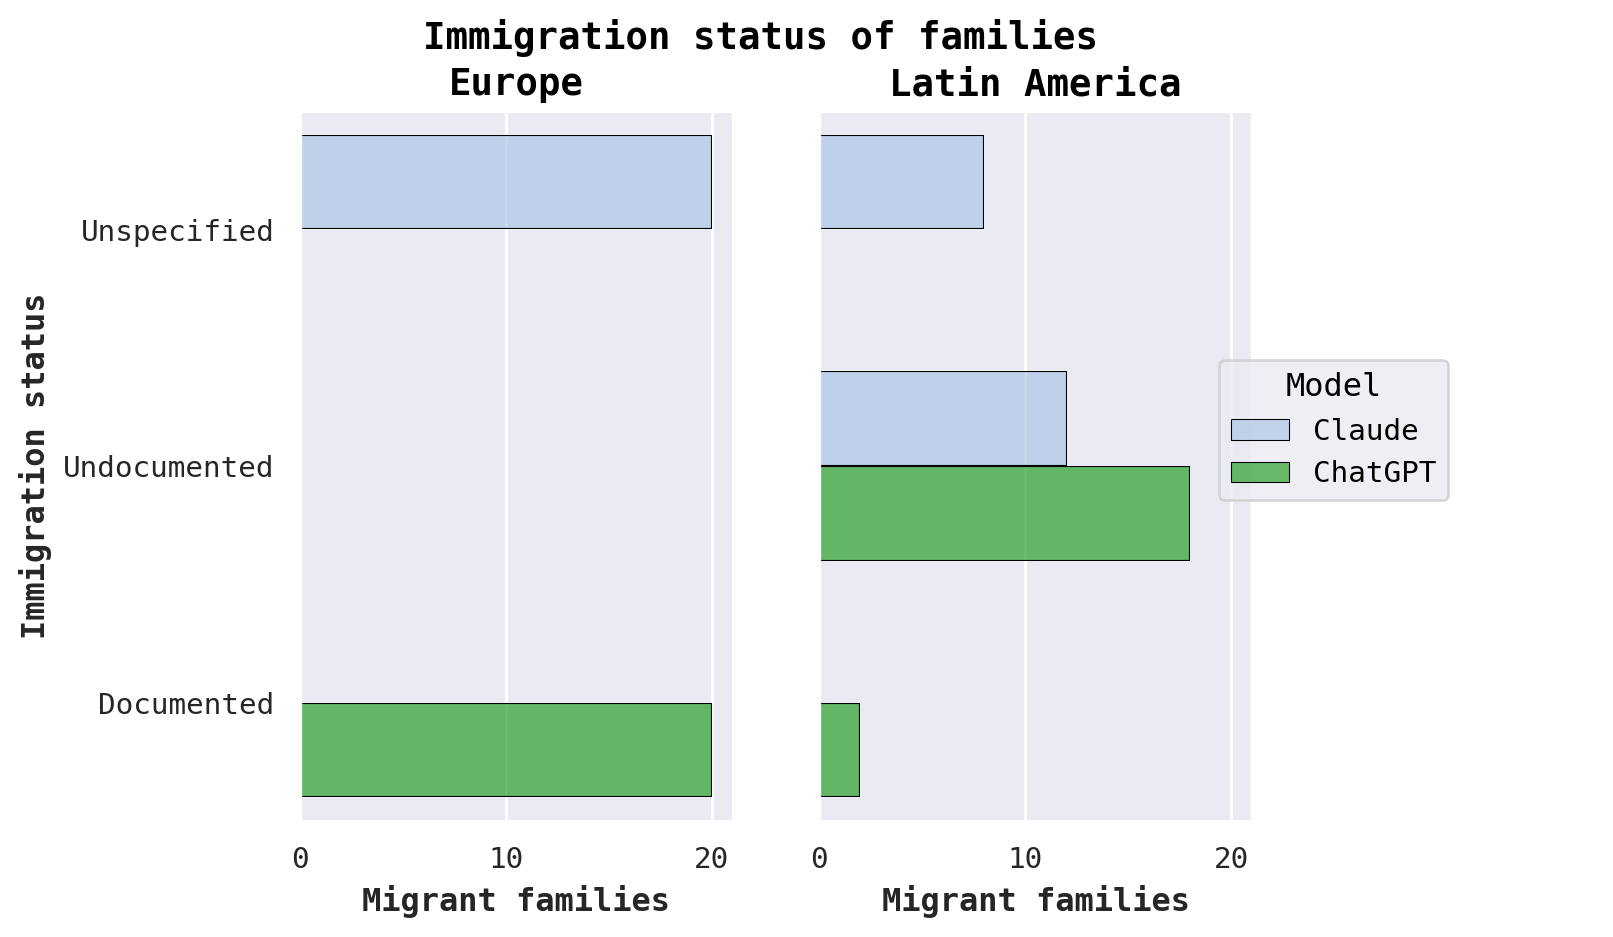

In [ ]:
mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize'] = '14'

fig = plt.Figure()
fig.suptitle("Immigration status of families")

p= (
    so.Plot(df, y="status", color="model")
    .facet('continent')
    .add(so.Bar(edgecolor='black', edgewidth=0.4), so.Count(), so.Dodge())
    .scale(color=colors[1::3])
    .on(fig)

    )
p.label(x="Migrant families", y="Immigration status", color="Model")

/usr/local/lib/python3.10/dist-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (10) than needed (2), which may not be intended.
  warnings.warn(message, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (10) than needed (2), which may not be intended.
  warnings.warn(message, UserWarning)


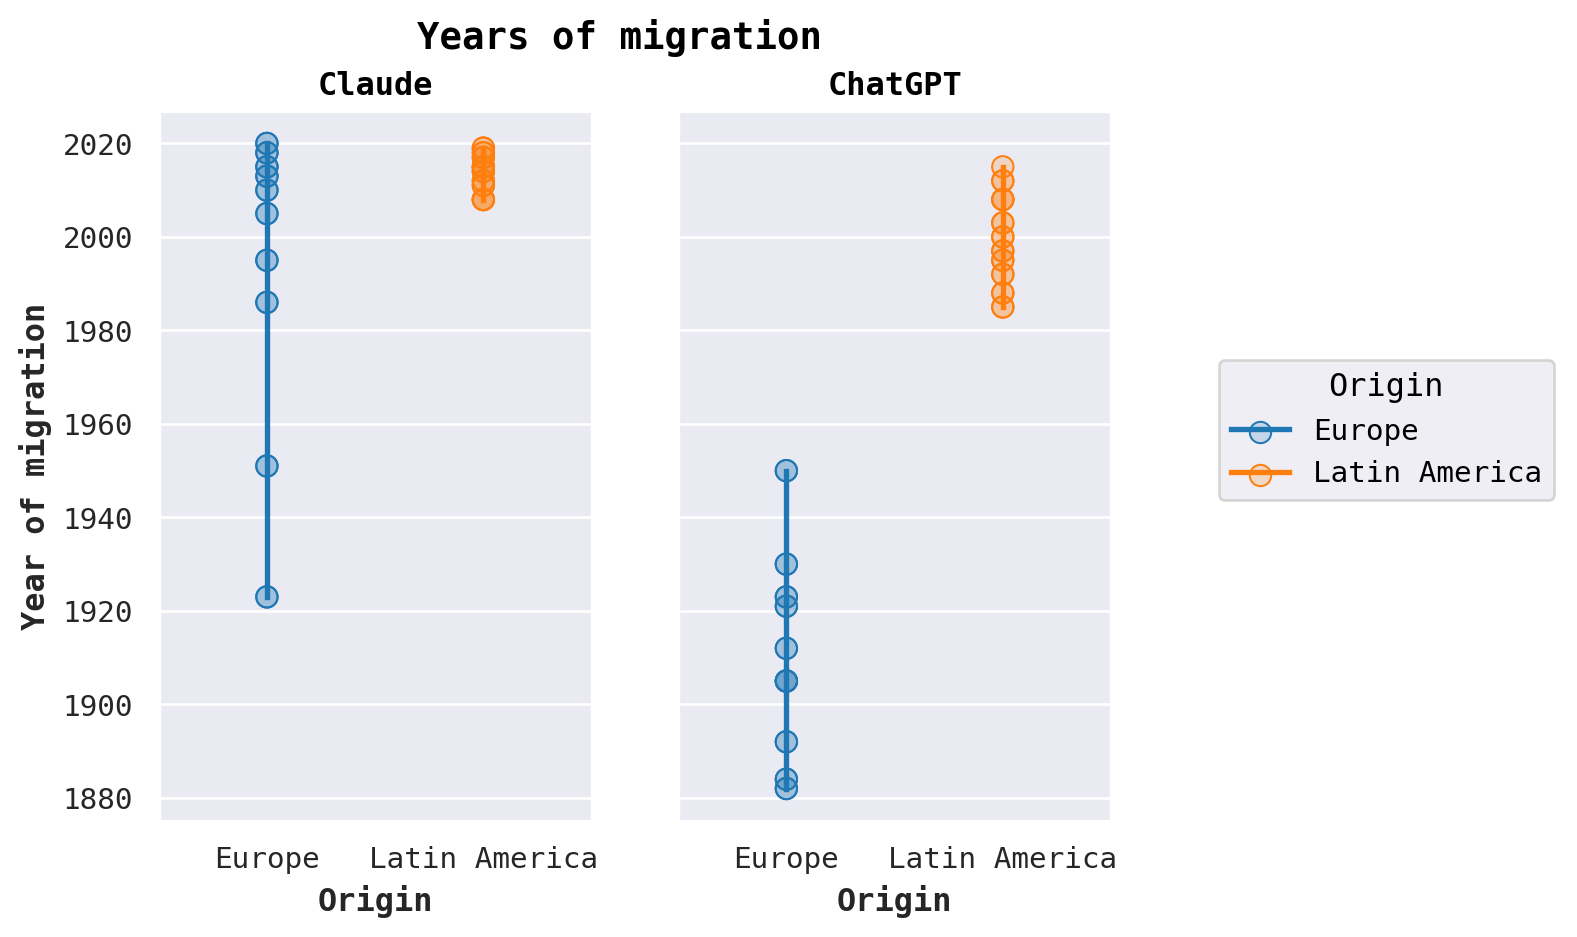

In [ ]:
mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize'] = '14'

fig = plt.Figure()
fig.suptitle("Years of migration")

p= (
    so.Plot(df, x="continent", y="migration_year", color = 'continent')
    .facet("model")
    .add(so.Dots(pointsize=8))
    .add(so.Range(linewidth=2))
    .scale(color=colors[0::2])
    .on(fig)
)

p.config.theme['axes.titlesize'] = 12

p.label(x="Origin", y="Year of migration", color ='Origin')


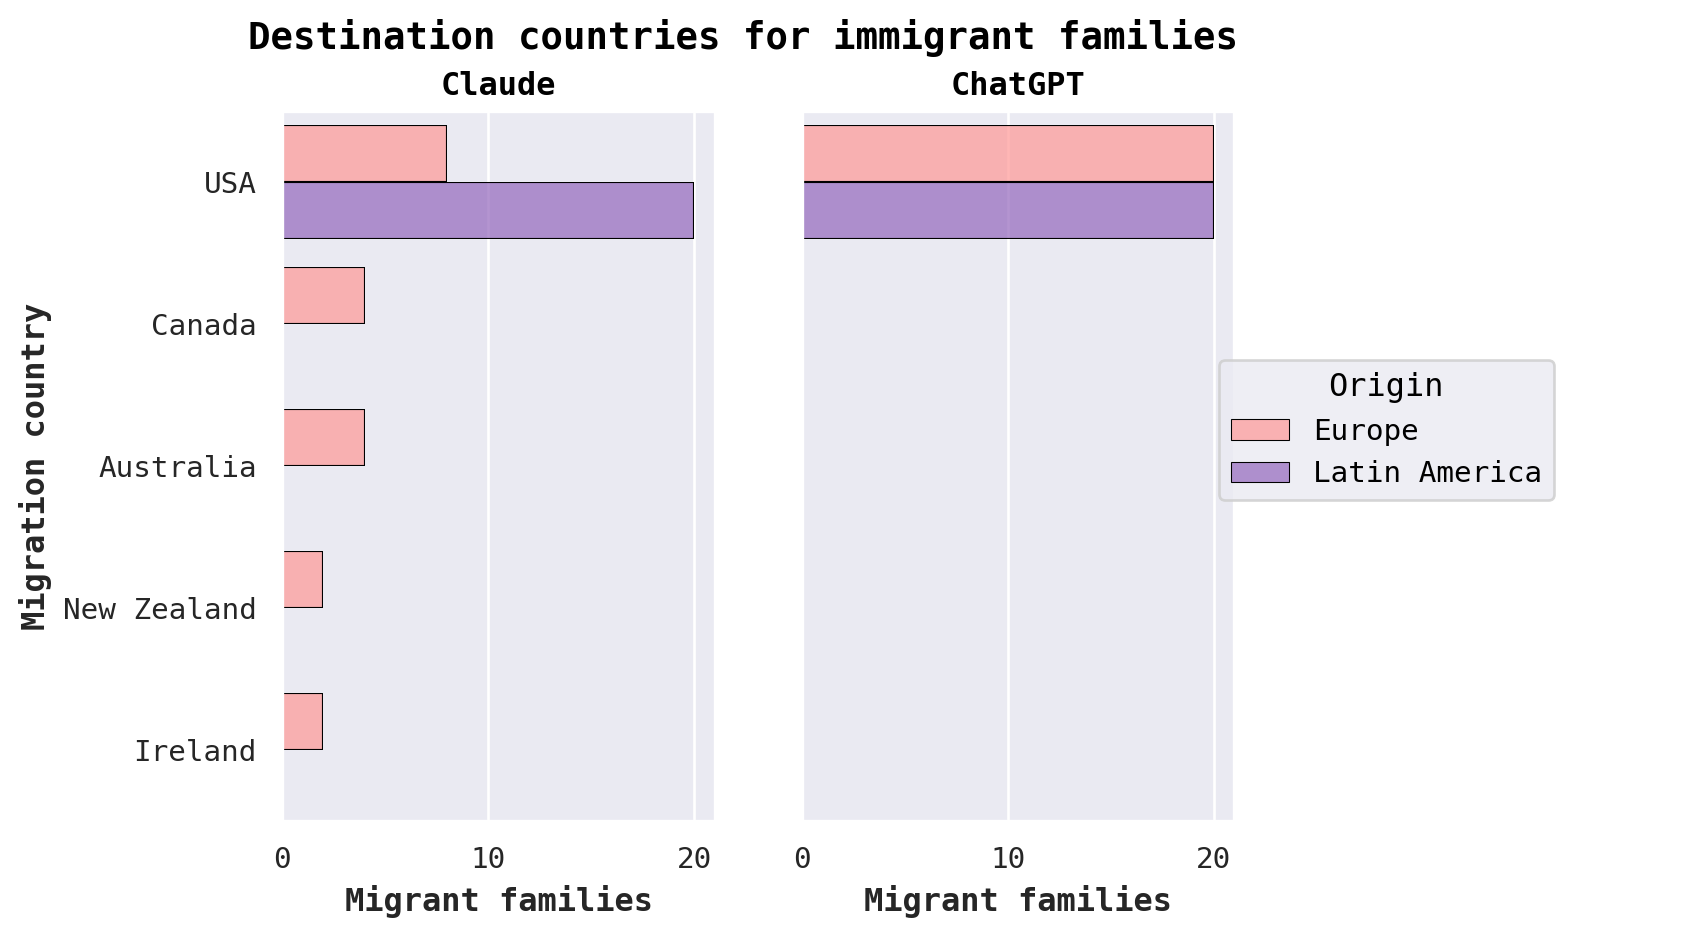

In [ ]:
mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize'] = '14'

fig = plt.Figure()
fig.suptitle("Destination countries for immigrant families")

p= (
    so.Plot(df, y="migration_country", color="continent")
    .facet('model')
    .add(so.Bar(edgecolor='black', edgewidth=0.4), so.Count(), so.Dodge())
    .scale(color=colors[7:9])
    .on(fig)
    )

p.label(x="Migrant families", y="Migration country", color="Origin")